In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Students Performance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df['Avg_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['Avg_score'] = df['Avg_score'].round(2)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33


In [ ]:
df.shape

(1000, 9)

In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0
Avg_score,0


In [ ]:
print(df['gender'].value_counts())
print('\n')
print(df['parental level of education'].value_counts())
print('\n')
print(df['race/ethnicity'].value_counts())
print('\n')
print(df['lunch'].value_counts())
print('\n')
print(df['test preparation course'].value_counts())
print('\n')

gender
female    518
male      482
Name: count, dtype: int64


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


lunch
standard        645
free/reduced    355
Name: count, dtype: int64


test preparation course
none         642
completed    358
Name: count, dtype: int64




In [ ]:
df["test preparation course"] = df["test preparation course"].replace({
    "none": "not completed",
    "completed": "completed"
})

In [ ]:
print(df['gender'].dtype)
print(df['parental level of education'].dtype)
print(df['race/ethnicity'].dtype)
print(df['lunch'].dtype)
print(df['test preparation course'].dtype)
print(df['math score'].dtype)
print(df['reading score'].dtype)
print(df['writing score'].dtype)

object
object
object
object
object
int64
int64
int64


In [ ]:
figsize = (800/300), (600/300)
dpi = 300

## V1

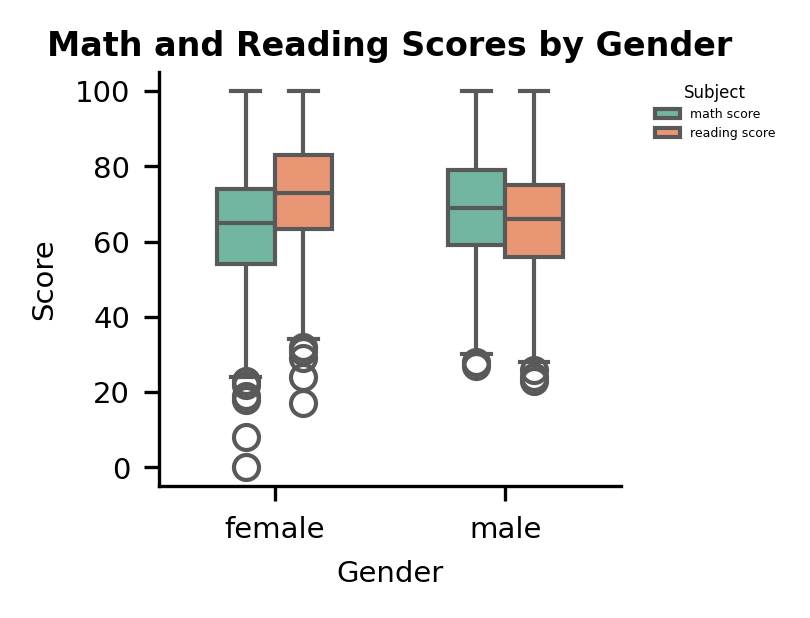

In [ ]:
df_melted = df.melt(
    id_vars=['gender'],
    value_vars=['math score', 'reading score'],
    var_name="Subject",
    value_name="Score"
)

fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

sns.boxplot(
    x='gender',
    y="Score",
    hue="Subject",
    data=df_melted,
    palette="Set2",
    width=0.5,
    ax=ax
)

ax.set_title("Math and Reading Scores by Gender", fontsize=8, weight="bold", pad=4)
ax.set_xlabel("Gender", fontsize=7)
ax.set_ylabel("Score", fontsize=7)


ax.tick_params(axis='x', labelsize=7)
ax.tick_params(axis='y', labelsize=7)


ax.legend(
    title="Subject",
    fontsize=3, title_fontsize=4,
    frameon=False,
    loc="upper left", bbox_to_anchor=(1.05, 1)
)

sns.despine()
plt.tight_layout(pad=0.5)

plt.savefig("scores_by_gender.png", dpi=300, bbox_inches="tight")
plt.show()


## V2

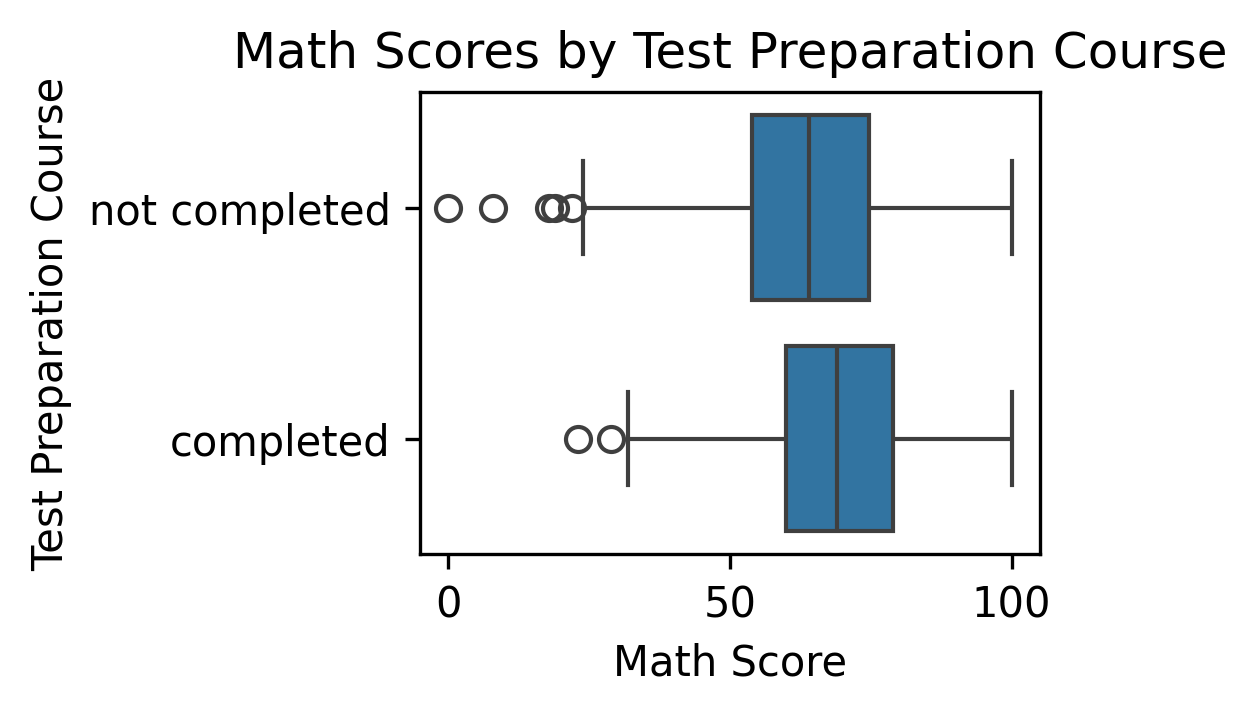

In [ ]:
plt.figure(figsize=figsize, dpi=dpi)

sns.boxplot(x='math score', y='test preparation course', data=df)
plt.title("Math Scores by Test Preparation Course")
plt.xlabel("Math Score")
plt.ylabel("Test Preparation Course")
plt.show()

## V3

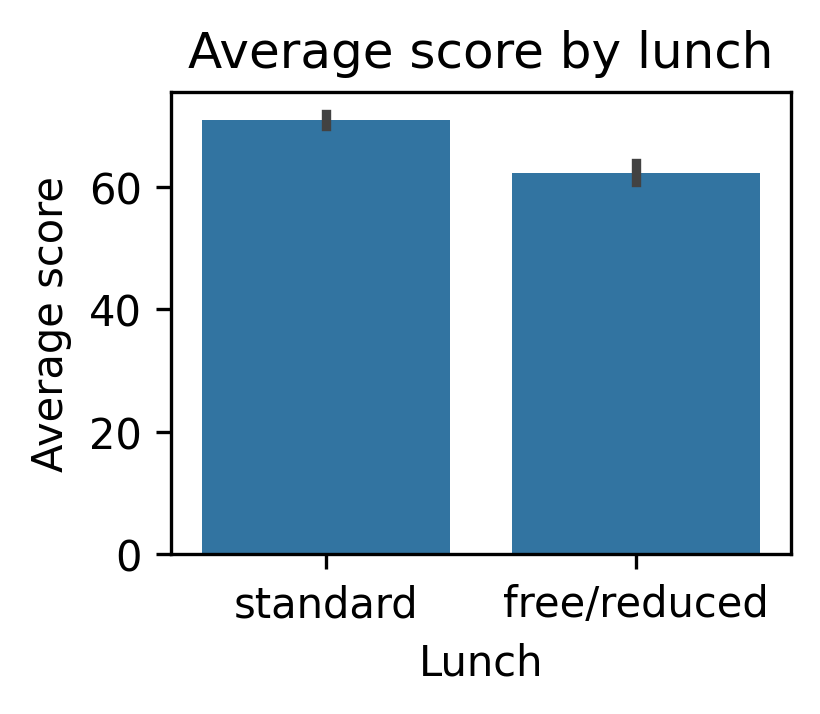

In [ ]:
plt.figure(figsize=figsize, dpi=300)

sns.barplot(x = df['lunch'], y= df['Avg_score'], data=df)
plt.title("Average score by lunch")
plt.xlabel("Lunch")
plt.ylabel("Average score")
plt.show()

## V4

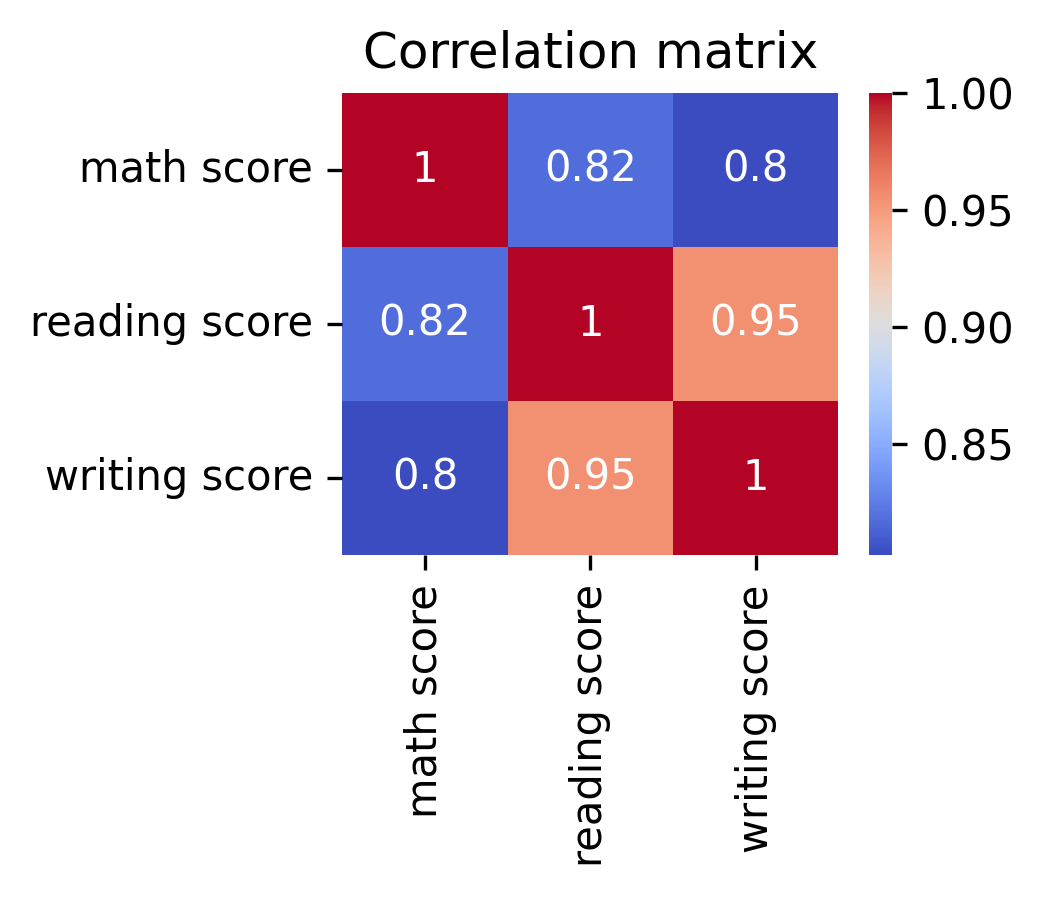

In [ ]:
plt.figure(figsize=figsize, dpi=300)

corr = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

## V5

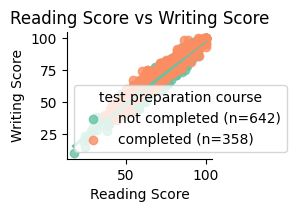

In [ ]:
g = sns.lmplot(
    x="reading score",
    y="writing score",
    data=df,
    hue="test preparation course",
    height = 600 / 300 ,
    aspect = (800 / 300) / (600 / 300),
    palette="Set2",
)

# Title and labels
g.set_axis_labels("Reading Score", "Writing Score")
plt.title("Reading Score vs Writing Score")

# Build mapping for legend labels with counts
counts = df["test preparation course"].value_counts()
label_map = {
    "not completed": f"not completed (n={counts['not completed']})",
    "completed": f"completed (n={counts['completed']})"
}

# Remove the default seaborn legend
g._legend.remove()

# Add custom legend
handles, labels = g.axes[0,0].get_legend_handles_labels()
new_labels = [label_map[label] for label in labels]
plt.legend(handles, new_labels, title="test preparation course")

plt.show()
